# Sensitivity analysis for Bayesian networks using credal networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn=gum.fastBN("A->B->C<-D->E->F<-B")
gnb.flow.row(bn,gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

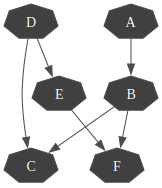

In [3]:
cr=gum.CredalNet(bn,bn)
gnb.show(cr)

In [4]:
cr.bnToCredal(beta=1e-10,oneNet=False)

In [5]:
cr.computeBinaryCPTMinMax()

In [6]:
print(cr)


A:Range([0,1])
<> : [[0.236576 , 0.763424] , [0.228072 , 0.771928]]

B:Range([0,1])
<A:0> : [[0.21291 , 0.78709] , [0.0790431 , 0.920957]]
<A:1> : [[0.735574 , 0.264426] , [0.00365832 , 0.996342]]

C:Range([0,1])
<B:0|D:0> : [[0.77468 , 0.22532] , [0.774678 , 0.225322]]
<B:1|D:0> : [[0.851103 , 0.148896]]
<B:0|D:1> : [[0.301457 , 0.698543] , [0.299069 , 0.700931]]
<B:1|D:1> : [[0.55268 , 0.44732] , [0.55264 , 0.44736]]

D:Range([0,1])
<> : [[0.757474 , 0.242526] , [0.757472 , 0.242528]]

E:Range([0,1])
<D:0> : [[0.226301 , 0.773699] , [0.215628 , 0.784372]]
<D:1> : [[0.350808 , 0.649192] , [0.0351421 , 0.964858]]

F:Range([0,1])
<E:0|B:0> : [[0.556643 , 0.443357] , [0.556605 , 0.443395]]
<E:1|B:0> : [[0.181884 , 0.818116] , [0.125937 , 0.874063]]
<E:0|B:1> : [[0.835908 , 0.164091]]
<E:1|B:1> : [[0.61976 , 0.38024] , [0.619745 , 0.380255]]




## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [7]:
def showNoisy(bn,beta):
  cr=gum.CredalNet(bn,bn)
  cr.bnToCredal(beta=beta,oneNet=False)
  cr.computeBinaryCPTMinMax()
  ielbp=gum.CNLoopyPropagation(cr)  
  return gnb.getInference(cr,engine=ielbp)

In [8]:
for eps in [1,1e-1,1e-2,1e-3,1e-10]:
  gnb.flow.add(showNoisy(bn,eps),caption=f"noise={eps}")
gnb.flow.display()